# Introduction

Welcome to the seventh lab. After learning about SVMs last week, we finally introduce the _kernel trick_ and make them capable of tackling nonlinear data. We also introduced more generally the concept of _function mapping_ and learned a bit about word embeddings.

# 1. Function Mappings

#### 1.1 **[3pt]** Give an _original_ example for each of the following concepts:

1. Mapping from an example data type to a decision space
2. Inverse mapping
3. Mapping from the example data to two destination feature spaces
4. Mapping from the two feature spaces above to a decision space

1. Given a picture, decide if it represents an apple or an orange. Original space: 
$64\times64\times3$ images; destination space: $\{$apple, orange$\}$.
2. Given the label apple, map it to a $64\times64\times3$ picture of the fruit.
3. (Feature Extraction) Map $\Phi_1$ goes from the picture to an estimate of average color; map $\Phi_2$ goes from the picture to a fruit width measured in pixels.
4. (Decision Mapping) Map $\Phi_3$ goes from the two features of estimated color and fruit width, to the decision space of classifying the fruit as apple or orange.

#### 1.2 **[1pt]** Explain advantages and disadvantages of Bag Of Words versus Word Embedding.

For Bag of Words (BoW), the feature vectors are very high dimensional (size of the dictionary) and sparse (each text only uses a subset of the dictionary) while there's smaller and dense feature space in Word Embedding (WE).

More importantly, BoW only uses tallying of the used words (counts the number of occurences) while WE calculate similarities between words as vector distances, encoding words that tends to appear often together with closer vectors in feature space. This allows deduction and reasoning of word relationships based on vector similarity (distance and angle).

#### 1.3 **[2pt]** Refer to the graph exemplifying Word Embedding in the slides, and its explanation. (i) What does it mean that the point representing Paris is close to the point representing Berlin? (ii) Why is the point for Paris closer to the point for France than to the point representing Italy?

(i) The point representing Paris is close to the point representing Berlin: these two words refer to similar concepts that are commonly found together in the text corpus.

(ii) The point for Paris closer to the point for France than to the point representing Italy: Paris tends to appear more often closer to France than to Italy in the text corpus.

# 2. Kernels theory

#### 2.1 **[1pt]** Write the definition of kernel function (use latex).

$k(x,y) = \langle \phi(x), \phi(y) \rangle$    $\forall x,y \in X$

#### 2.2 **[1pt]** Explain the Representer property in English.

Each datapoint $x$ in **original space** is represented by a real valued function $\phi(x)= k(.,x)$ in **feature space** $\mathcal{H}$. In another words, each $x \in X$ is associatedd with its kernelized counterpart $k(.,x) \in \mathcal{H}$.

#### 2.3 **[2pt]** Explain the kernel trick in English.

The kernel function equals to the inner product of mapped data:
$k(x,y) = \langle \phi(x), \phi(y) \rangle  = \langle k(.,x), k(.,y) \rangle$.

**Kernel trick** states that the kernel functon between 2 points in oringinal space is equivalent to the **inner product between the mapping of the 2 data points** into RKHS. This is useful because it allows us to use all the positive properties of RKHS while avoiding explicitly define the mapping function, which can be potentially complex and timeconsuming (kernel trick).

The actual formulation of the kernel function can be any form that produces a Gram matrix that is symmetric and positive semi-definite.

#### 2.4 **[1pt]** Explain in English the required properties of a Mercer kernel.

* Symmetry: kernel function is unchanged if we switch the order of the parameters.
* Positive definiteness: The Gram matrix of the kernel is positive semi- definite for any finite subset of the input space.

#### 2.5 **[1pt]** Calculate by hand the linear kernel on points $\{[2,4], [1, -2]\}$.

The linear kernel is computed as: 

$k(x_1,x_2) = x_1^Tx_2$

$k([2,4],[1,-2]) = [2,4]^T.[1,-2] = 2*1+4*(-2) = -6$

#### 2.6 **[1pt]** How do you compute the entry of the Gram matrix for row $i$ and column $j$ for a Gaussian kernel?

The "radial" Gaussian kernel:

$K_{ij}= k(x_i,x_j) = exp(-\gamma. \|x_i - x_j\|^2)$ for $\gamma >0$


#### 2.7 **[2pt]** Explain why does the Perceptron work with non-linearly separable data using Kernelization. Do you think Linear Regression would work with Kernelization? Explain your reasoning.

As we know Perceptron never stops in non-linearly separable data. However Kernelization's able to map non-linear separation data to a Hilbert space where the data is hopefully linearly separable. Thus, Kernel Perceptron is able to do linear separation.

The same works with any linear algorithm, including Linear Regression: once Kernelization takes care of nonlinearities, the linear algorithm can do its job without problems.

#### 2.8 **[1pt]** Explain the Universal Consistency of SVMs (in English).

SVMs with Gaussian kernels are *universal function approximators*, meaning that they can approximate any arbitrary function.

# 3. Kernels in practice

For simplicity, let's use once again a two-species adaptation of the Iris dataset. You can copy the code from the last assignment. This time though, to make it harder for linear classifiers let's separate the "central" species from the other two. This means that you should set label `versicolor` rather than `setosa` as class `-1`. I suggest you un-comment the `pairplot`s to verify it works.  
NOTE: all recommendation on how to handle and prepare the data from the past assignment(s) still hold. As do the warnings that using the wrong data sets will **invalidate the whole answer**.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

In [ ]:
df = sns.load_dataset('iris')
#sns.pairplot(df, hue='species')

df.loc[df['species'] == 'versicolor', 'species'] = -1
df.loc[df['species'] != -1, 'species'] = 1
df['species'] = pd.to_numeric(df['species'])
print(df.dtypes)
#sns.pairplot(df, hue='species')

In [ ]:
# Splitting the data:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size= 0.2) #80-20 split

#sns.pairplot(test, hue='species')

#### 3.1 **[1pt]** Train an SVM with linear kernel on the Iris data using Scikit-learn (this time you are required to use class `SVC`). Then do the same using a Gaussian kernel (still `SVC`) and compare the performance using its method `score()`.

- Remember to prepare inputs/labels for Scikit-learn; again the last assignment should help.
- Calling the method `score()` on the trained model just does the prediction and returns the percentage of correct answers. It is a useful function to learn to quickly check if your model is working.
- You expect the linear kernel to perform poorly. If the performance is close to the Gaussian kernel, it is possible that the test set was by chance not homogeneous. You can verify that by doing a pairplot on the test set, and if so just run the data loading and preparation again.
- No need to find an optimal value for `C` but pass it explicitly.

In [10]:
from sklearn.svm import SVC

x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

linear_kernel = SVC(kernel='linear', C=1).fit(x_train, y_train)
print(linear_kernel.score(x_test, y_test))

Gaussian_kernel = SVC(kernel='rbf', C= 1).fit(x_train, y_train)
print(Gaussian_kernel.score(x_test, y_test))

0.7
0.9333333333333333


#### 3.2 **[1pt]** Write a Python function that takes two data points and a value for `gamma` as input, and returns the Gaussian kernel of the points.

In [11]:
def Gaus_kern (x, y, gamma):
    return np.exp(-gamma * np.linalg.norm(x-y)**2)

#### 3.3 **[3pt]** Write a Python function that takes two dataset (and a gamma) and returns their Gram matrix for a Gaussian kernel.

- You need two datasets because you need to compute the *train* matrix between the train and itself, but the *test* matrix between the test and the train.
- Simplest method:
    - Create a return matrix, initially empty, shaped size_of_A times size_of_B, with dtype 'float64'
    - Run two loops with indices (i, j) in ranges up to size_of_A and size_of_B
    - Compute the kernel between row i in A and row j in B, and place it in the return matrix at row i column j
- Careful with Pandas' `iterrows()`, as the "index" it returns is the DataFrame index (i.e. for use with `loc[]`), not the ordinal index (i.e. for `iloc[`). 
- Generating the matrix automatically is harder, as there is no straightforward way to compute an `outer` in numpy or pandas with a custom function.
- One way is to use `column_stack` https://stackoverflow.com/a/21759340 then apply the kernel defined above.
- Another is to use `ufunc.outer` :https://numpy.org/doc/stable/reference/generated/numpy.ufunc.outer.html
or http://folk.uio.no/inf3330/scripting/doc/python/NumPy/Numeric/numpy-7.html which is only defined for Universal Functions (`ufuncs`). Look at the examples for `outer`, you can re-implement the function above starting with `np.subtract.outer(A, B)`, which generates the matrix (but check the shape!), then you can run the other operations using broadcast. Both outers and universal functions are super useful, it's worth the effort of learning them, more [[here]](https://docs.scipy.org/doc/numpy/reference/ufuncs.html).
- `pandas.apply()` along rows is also an option you should be able to consider with by now. The function name for `-` is `np.subtract` (which is an `ufunc`, see above).

Above all, remember the first rule of a good BDD engineer: red, green, refactor! First make it work, then make it better ;) complex solutions are as good as bonus questions here.

Also, know that a common default value for gamma is one over the number of features.

In [12]:
def Gram(dset_1, dset_2, gamma= None):
    npoints_1, nfeasts_1 = dset_1.shape
    npoints_2, nfeasts_2 = dset_2.shape
    # number of data points in the two training datasets must be equal
    assert nfeasts_1 == nfeasts_2  #always check for consistency
    if gamma is None:
        gamma = 1/nfeasts_1
    
    Gram_matrix = np.empty([npoints_1, npoints_2], dtype='float64') #Kernel matrix size n x n
    for r in range(npoints_1):
        for c in range(npoints_2):
            Gram_matrix[r][c] = Gaus_kern(dset_1.iloc[r], dset_2.iloc[c], gamma)
    return Gram_matrix

The difference between inner and outer product can be intuitively summarized as: given two vectors, do you want to aggregate their products into a scalar or distribute the operations over a matrix? The first case is a dot product between e.g. a 1x3 and 3x1 vectors, the second would be between a 3x1 and a 1x3 vectors

#### 3.4 **[2pt]** Compute the Gram matrix on the inputs of your datasets. Then train a new SVM, same settings as before with linear kernel, but this time using the Gram matrix('s rows) as the inputs. Print the `score` performance of this new SVM.

- With an 80-20 split you are looking at a $120 \times 120$ shape for the train, and $30 \times 120$ for the test

In [13]:
# Compute the Gram matrix on the inputs of datasets (the mappings in destination space)
x_train_Gram = Gram(x_train, x_train)
x_test_Gram = Gram(x_test, x_train)

# check the shapes of the Gram
print(x_train_Gram.shape, x_test_Gram.shape)

(120, 120) (30, 120)


In [14]:
# Implement new SVM same setting with linear kernel but using Gram matrix as input

linear_kernel_onGram = SVC(kernel='linear').fit(x_train_Gram, y_train)
print(linear_kernel_onGram.score(x_test_Gram, y_test))

0.9666666666666667


There's a significant improvement in the score performance of this new SVM. Before is 0.73333, now we get 0.93333

#### 3.5 **[1pt]** Plot the confusion matrix for the three SVMs you trained in the past questions.

- Let's learn a convenient and easy function for this common, very useful metric: `ConfusionMatrixDisplay.from_estimator` [[link here]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator).
- So far we saw explicitly 4 cells: true and false positives, true and false negatives. More generally the confusion matrix can be scaled to any number of classes by having the correct labels on the rows, and the predictions on the columns. Errors will be outside the diagonal.
- You can use the `normalize` option to get percentages if you like. Which setting do you find most informative?
- It's easier if you write a `for` loop over the three models you trained in the previous questions -- just make sure you gave them different names. Also careful as one takes a Gram matrix as input ;)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

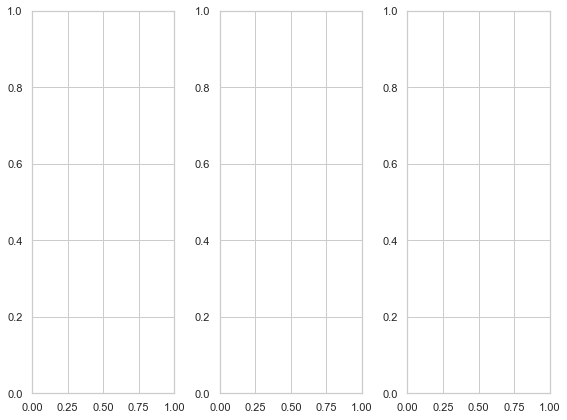

In [15]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

class_names = y_test.unique()
fig, axes = plt.subplots(1,3)
fig.tight_layout()

# Here's another trick: you can list the _names_ of the variables, 
# use their name on the title and fetch their values using `eval()`

for model_name, ax in zip(["lin", "Gaus","lin + Gauss"], axes):
    if model_name == "lin + Gauss":
        x_dset = x_test_Gram
    else:
        x_dset = x_test
    ConfusionMatrixDisplay.from_estimator(eval(model_name), x_dset, y_test,
                                         ax = ax,
                                         display_labels = class_names,
                                         colorbar = False,
                                         cmap = plt.cm.Blues,
                                         normalize = None)
    ax.set_title(model_name)